The Management team at Walmart Inc. wants to analyze the customer purchase
behavior (precisely, purchase amount) against the customer’s gender and the various
other factors to help the business make better decisions. They want to understand if the
spending habits differ between male and female customers: Do women spend more on
Black Friday than men?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('walmart_data.csv')

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
#checking the datatype of the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#changing the data types of Occupation, Marital_Status and Product_Category from int to object
columns= ['Occupation', 'Marital_Status', 'Product_Category']
df[columns]= df[columns].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
print(f"No. of rows are {df.shape[0]} and No. of columns are {df.shape[1]}")

No. of rows are 550068 and No. of columns are 10


We have 10 columns and 5 lakhs 50 thousand and 68 rows in the walmart dataset.

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There are no missing/null values in any any column in the walmart dataset.

In [ ]:
df.duplicated().sum()

0

There are no dulicates in the dataset.

In [ ]:
#Changing the Marital Status Unmarried in place of 0 and Married in place of 1 as it makes more sense to the data.
df['Marital_Status']=df['Marital_Status'].replace({0:'Unmarried', 1:'Married'})


In [ ]:
gender_proportion=np.round(df['Gender'].value_counts(normalize=True)*100)
gender_proportion

,proportion
Gender,
M,75.0
F,25.0


Approximately 75% are Males and 25% are Females

In [ ]:
marital_status_proportion=np.round(df['Marital_Status'].value_counts(normalize=True)*100)
marital_status_proportion

,proportion
Marital_Status,
Unmarried,59.0
Married,41.0


59% are unmarried and 41% are married.

In [ ]:
for i in df.columns:
  print(i, ':', df[i].nunique())


User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [ ]:
age_proportion=np.round(df['Age'].value_counts(normalize=True)*100)
age_proportion

,proportion
Age,
26-35,40.0
36-45,20.0
18-25,18.0
46-50,8.0
51-55,7.0
55+,4.0
0-17,3.0


Around 40% people are in range of 26-35 years and below 17 years of age are 3%.

In [ ]:
Stay_In_Current_City_Years_proportion=	np.round(df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100)
Stay_In_Current_City_Years_proportion

,proportion
Stay_In_Current_City_Years,
1,35.0
2,19.0
3,17.0
4+,15.0
0,14.0


Around 35% are staying in current city from 1 year, 19% are staying from 2 year, 17% are staying from 3 year, 15% are staying for more than 4 years and 14% have just now came to the city.

**Find the outliers for every continuous variable in the dataset**

In [ ]:
df['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


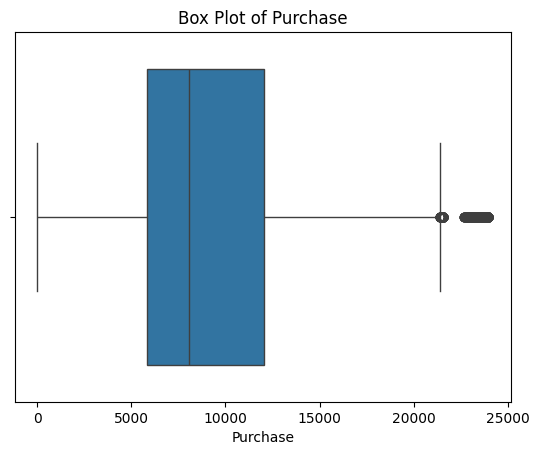

In [ ]:
sns.boxplot(df['Purchase'],orient='h')
plt.title("Box Plot of Purchase")
plt.show()

In [ ]:
purchase_25= np.percentile(df['Purchase'],25)
purchase_25

5823.0

In [ ]:
purchase_50= np.percentile(df['Purchase'],50)
purchase_50

8047.0

In [ ]:
purchase_75= np.percentile(df['Purchase'],75)
purchase_75

12054.0

In [ ]:
iqr_purchase= purchase_75-purchase_25
iqr_purchase

6231.0

In [ ]:
#now to calculate the buffer
upper_purchase_limit= purchase_75+1.5*iqr_purchase
upper_purchase_limit

21400.5

It means that any value above 21400.5 will be considered as an outlier in case of Purchase.

In [ ]:
purchase_outliers= df[df['Purchase']>upper_purchase_limit]
purchase_outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Unmarried,10,23603
375,1000062,P00119342,F,36-45,3,A,1,Unmarried,10,23792
652,1000126,P00087042,M,18-25,9,B,1,Unmarried,10,23233
736,1000139,P00159542,F,26-35,20,C,2,Unmarried,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Unmarried,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,Unmarried,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,Unmarried,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,Married,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,Married,10,23663


**Remove/clip the data between the 5 percentile and 95 percentile**

In [ ]:
lower_bound = df['Purchase'].quantile(0.05)
upper_bound = df['Purchase'].quantile(0.95)
lower_bound, upper_bound

(1984.0, 19336.0)

In [ ]:
df['Purchase_clipped'] = np.clip(df['Purchase'], a_min=lower_bound, a_max=upper_bound)

<ipython-input-27-fc30952a4e27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', ax=axs[0,0], palette='pastel')
<ipython-input-27-fc30952a4e27>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age', ax=axs[0,1], palette='colorblind')
<ipython-input-27-fc30952a4e27>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Occupation', ax=axs[1,0], palette='deep')
<ipython-input-27-fc30952a4e27>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

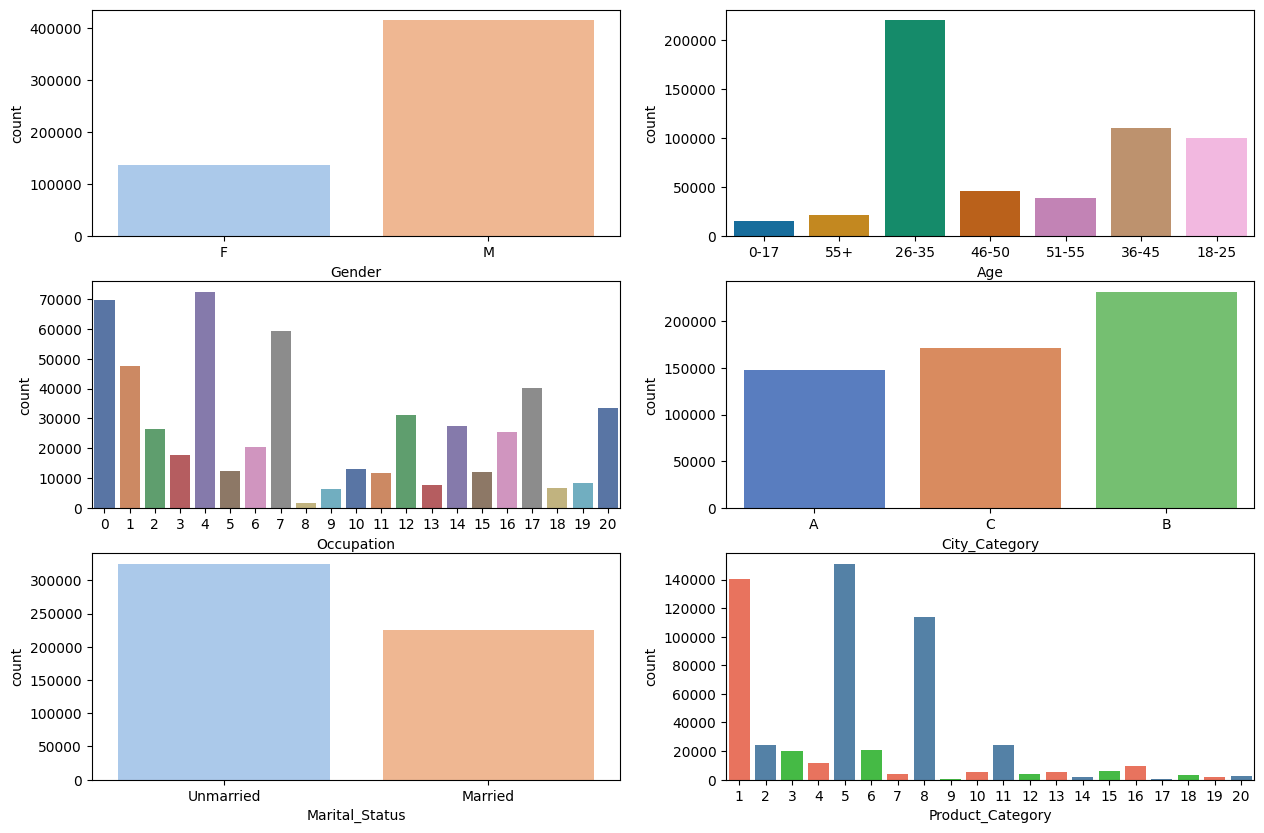

In [ ]:
categorical_columns= ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category']

fig,axs= plt.subplots(nrows=3, ncols=2, figsize=(15,10))
custom_palette = ['#FF6347', '#4682B4', '#32CD32']
sns.countplot(data=df, x='Gender', ax=axs[0,0], palette='pastel')
sns.countplot(data=df, x='Age', ax=axs[0,1], palette='colorblind')
sns.countplot(data=df, x='Occupation', ax=axs[1,0], palette='deep')
sns.countplot(data=df, x='City_Category', ax=axs[1,1], palette='muted')
sns.countplot(data=df, x='Marital_Status', ax=axs[2,0], palette='pastel')
sns.countplot(data=df, x='Product_Category', ax=axs[2,1], palette=custom_palette)
plt.show()


Following observations can be drawn:-
* Males are much higher in number than females.
* Maximum people are in the age group of 26-35.
* There are 20 different types of occupation and 0, 4, 7 are occupation people employed more.
* Most users belong to City category 'B'.
* Unamrried customers are more in number as compared to married customers.
* There are 20 different types of Product Category in which 1,5 and 8 are most popular.   


<ipython-input-114-26914edf53d7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_products.index, y=top10_products.values, palette='viridis')


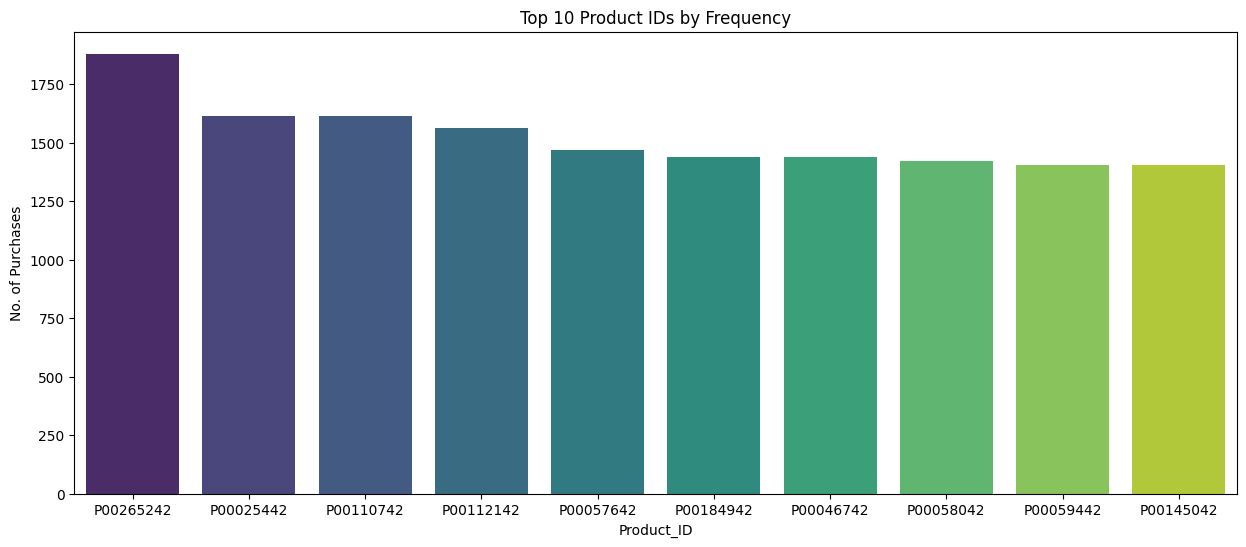

In [ ]:
product_counts= df['Product_ID'].value_counts()
top10_products= product_counts.head(10)
plt.figure(figsize=(15,6))
sns.barplot(x=top10_products.index, y=top10_products.values, palette='viridis')
plt.title('Top 10 Product IDs by Frequency')
plt.ylabel('No. of Purchases')
plt.show()

Clearly the the Product_ID 'P00265242' is the highest sold.

<ipython-input-115-6a6271bb2a64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_prod_category.index, y=top10_prod_category.values, palette='muted', order=top10_prod_category.index)


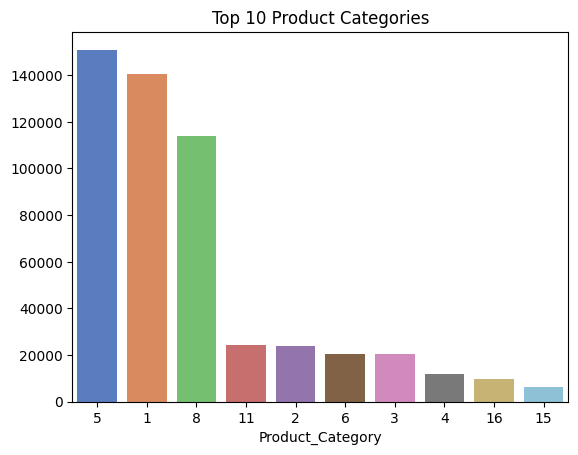

In [ ]:
prod_cat_count= df['Product_Category'].value_counts()
top10_prod_category= df['Product_Category'].value_counts().head(10)
sns.barplot(x=top10_prod_category.index, y=top10_prod_category.values, palette='muted', order=top10_prod_category.index)
plt.title('Top 10 Product Categories')
plt.show()

These are the top 10 product categories.
Notably Product category 1,5 and 8 are the most popular among customers.

Recommendations:-
To increase the sales of the product categories which are not so popular, maybe Walmart can bundle the similar low selling product categories with the poular/higher selling product_categories.

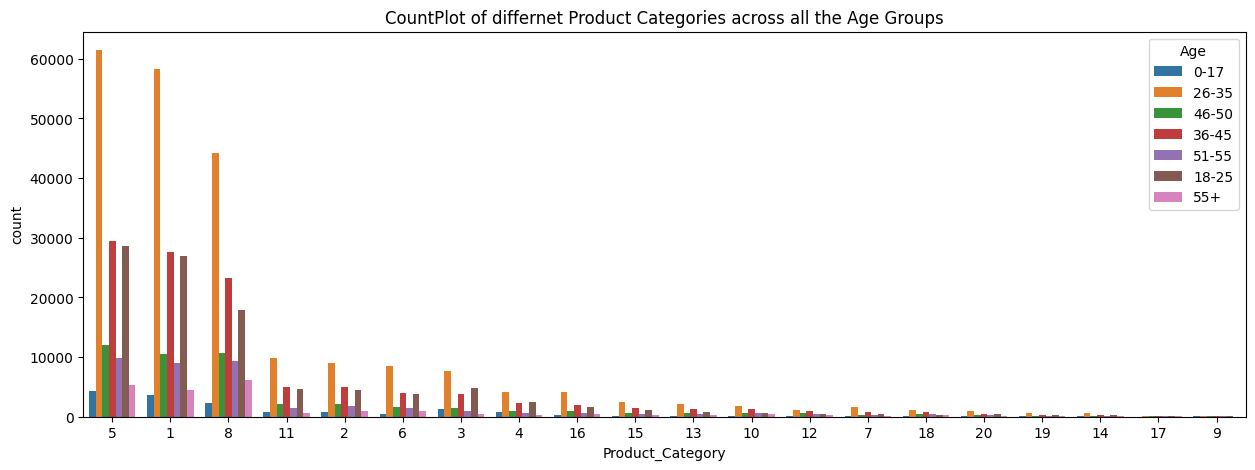

In [ ]:
figure = plt.figure(figsize=(15,5))
sns.countplot(x='Product_Category', hue='Age', data=df,  order=df['Product_Category'].value_counts().index)
plt.title('CountPlot of differnet Product Categories across all the Age Groups')
plt.show()

Insights:-
For the Top 3 product categories, age group 26-35 has bought the highest. Then it is followed by 36-45 and 18-25 age group people.
Recommendations:-
More focus can be put on 18-45 age group people (especially 26-35 age group).

**Is there a relationship between age, marital status, and the amount spent?**

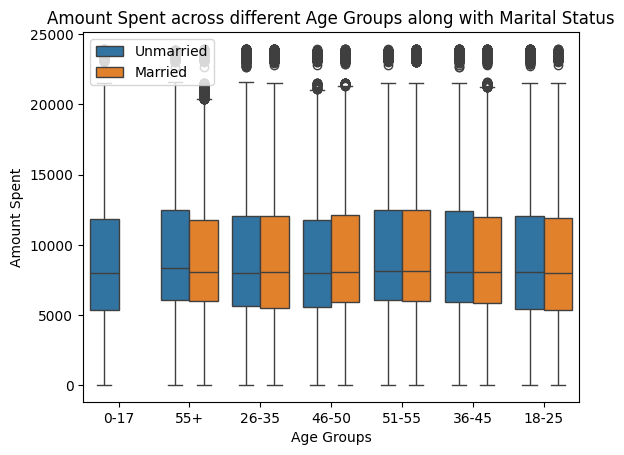

In [ ]:
sns.boxplot(x='Age', y='Purchase', hue='Marital_Status', data=df)
plt.legend(loc='upper left')
plt.ylabel('Amount Spent')
plt.xlabel('Age Groups')
plt.title("Amount Spent across different Age Groups along with Marital Status")
plt.show()

The median spending is very much similar acorss all age groups between married and unmarried people.
Also. the median spending is very much similar if we do comparison of partnered and single people.

<Axes: >

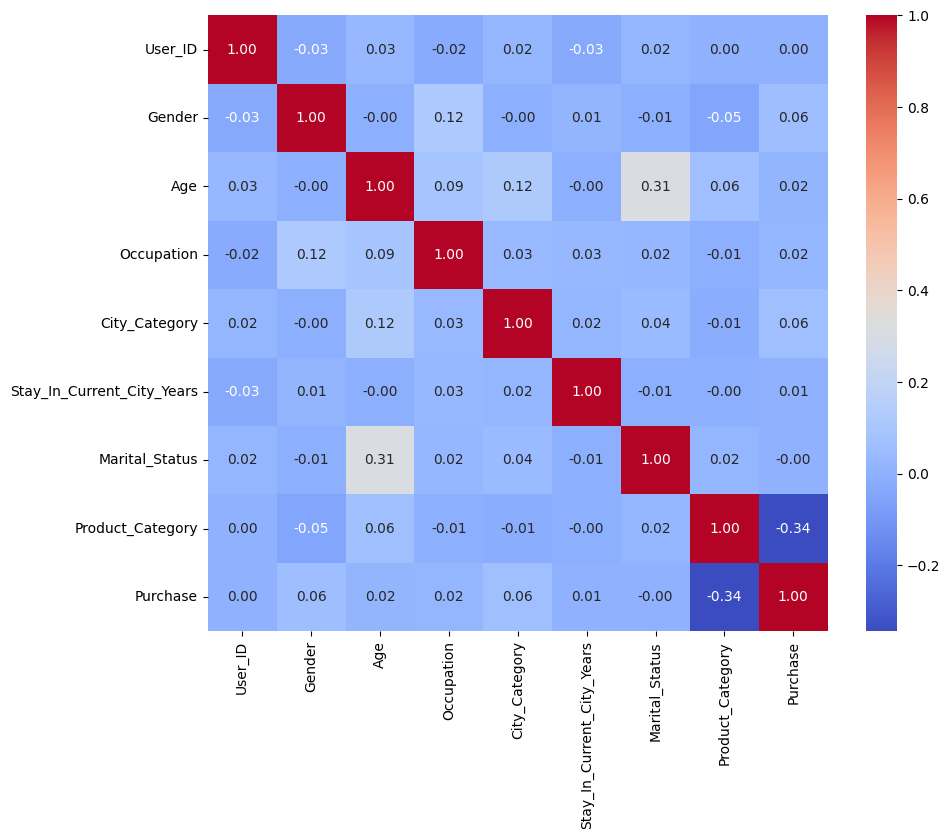

In [ ]:
df1=df.copy()
df1['Gender']=df1['Gender'].replace({'M':1, 'F':0})
age_map={
    '0-17':0,
    '18-25':1,
    '26-35':2,
    '36-45':3,
    '46-50':4,
    '51-55':5,
    '55+':6
}
df1['Age']=df1['Age'].replace(age_map)
city_map={
    'A':0,
    'B':1,
    'C':2
}
df1['City_Category']=df1['City_Category'].replace(city_map)
stay_map={
    '0':0,
    '1':1,
    '2':2,
    '3':3,
    '4+':4
}
df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].replace(stay_map)
df1['Marital_Status']= df1['Marital_Status'].replace({'Unmarried':0, 'Married':1})
df1.drop('Product_ID', axis=1, inplace=True)
num=df1[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']]
num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(num.corr(), annot=True, cmap='coolwarm', fmt='.2f')

* There is moderate positive correlation between age and marital status, which means that as age increases, chances of getting married increases.
* There is a moderate negative correlation between Purchase and product category, which means some of the product categories might be associated with lower purchase amount or vice versa.
*If we compare purchase with other columns, it shows weak correlations. This suggest there may not be strong linear relationship between most of the variables in the dataset.    



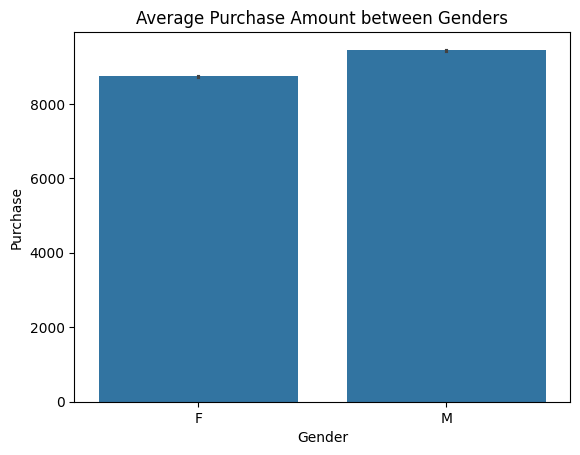

In [ ]:
sns.barplot(data=df, x='Gender', y='Purchase', estimator=np.mean)
plt.title('Average Purchase Amount between Genders')
plt.show()


On comparing the average purchase amount, males tend to spend higher than females. But females also contribute significantly compared to males.

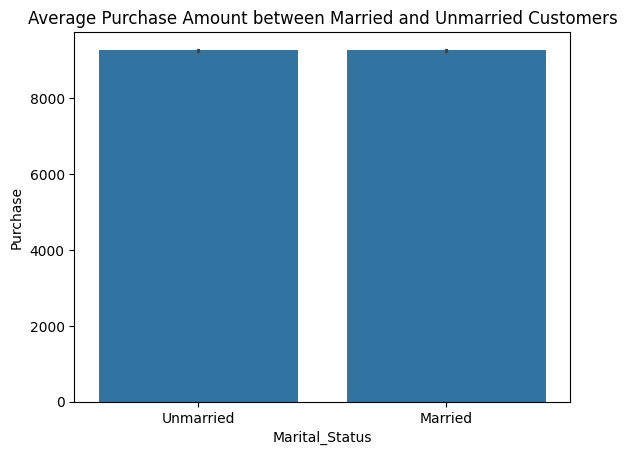

In [ ]:
sns.barplot(data=df, x='Marital_Status', y='Purchase', estimator=np.mean)
plt.title('Average Purchase Amount between Married and Unmarried Customers')
plt.show()

Married and unmarried tends to spend equally. This shows that both categories are equally important when their average purchasing is considered.

**Are there preferred product categories for different genders?**

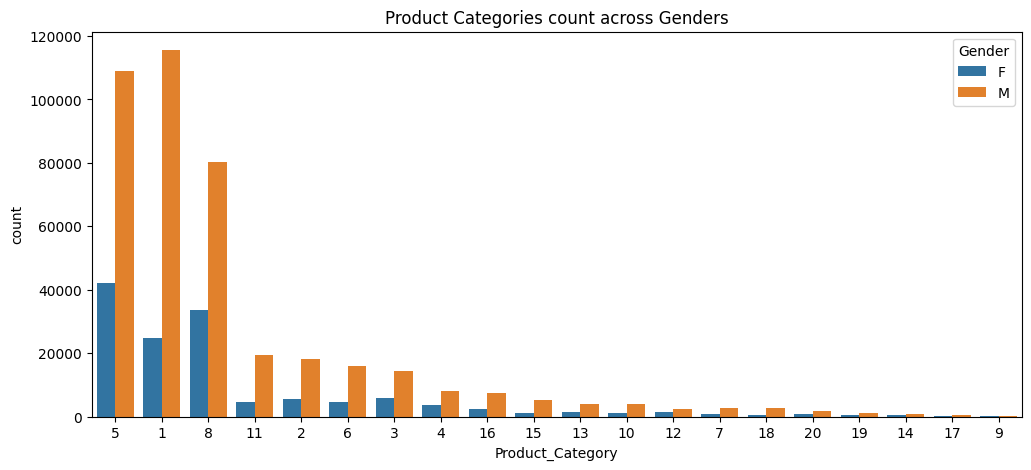

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Product_Category', hue='Gender', order= df['Product_Category'].value_counts().index)
plt.title('Product Categories count across Genders')
plt.show()

* The top 3 product categories that are most popular across males are 1,5 and 8.
* The top 3 product categories that are most popular across females are also 1,5 and 8.

Recommendations:-
* The product categories which are less popular which are contributing significantly in the revenue of Walmart, the retail corporation should focus less on these type of categories or maybe they could discard them.

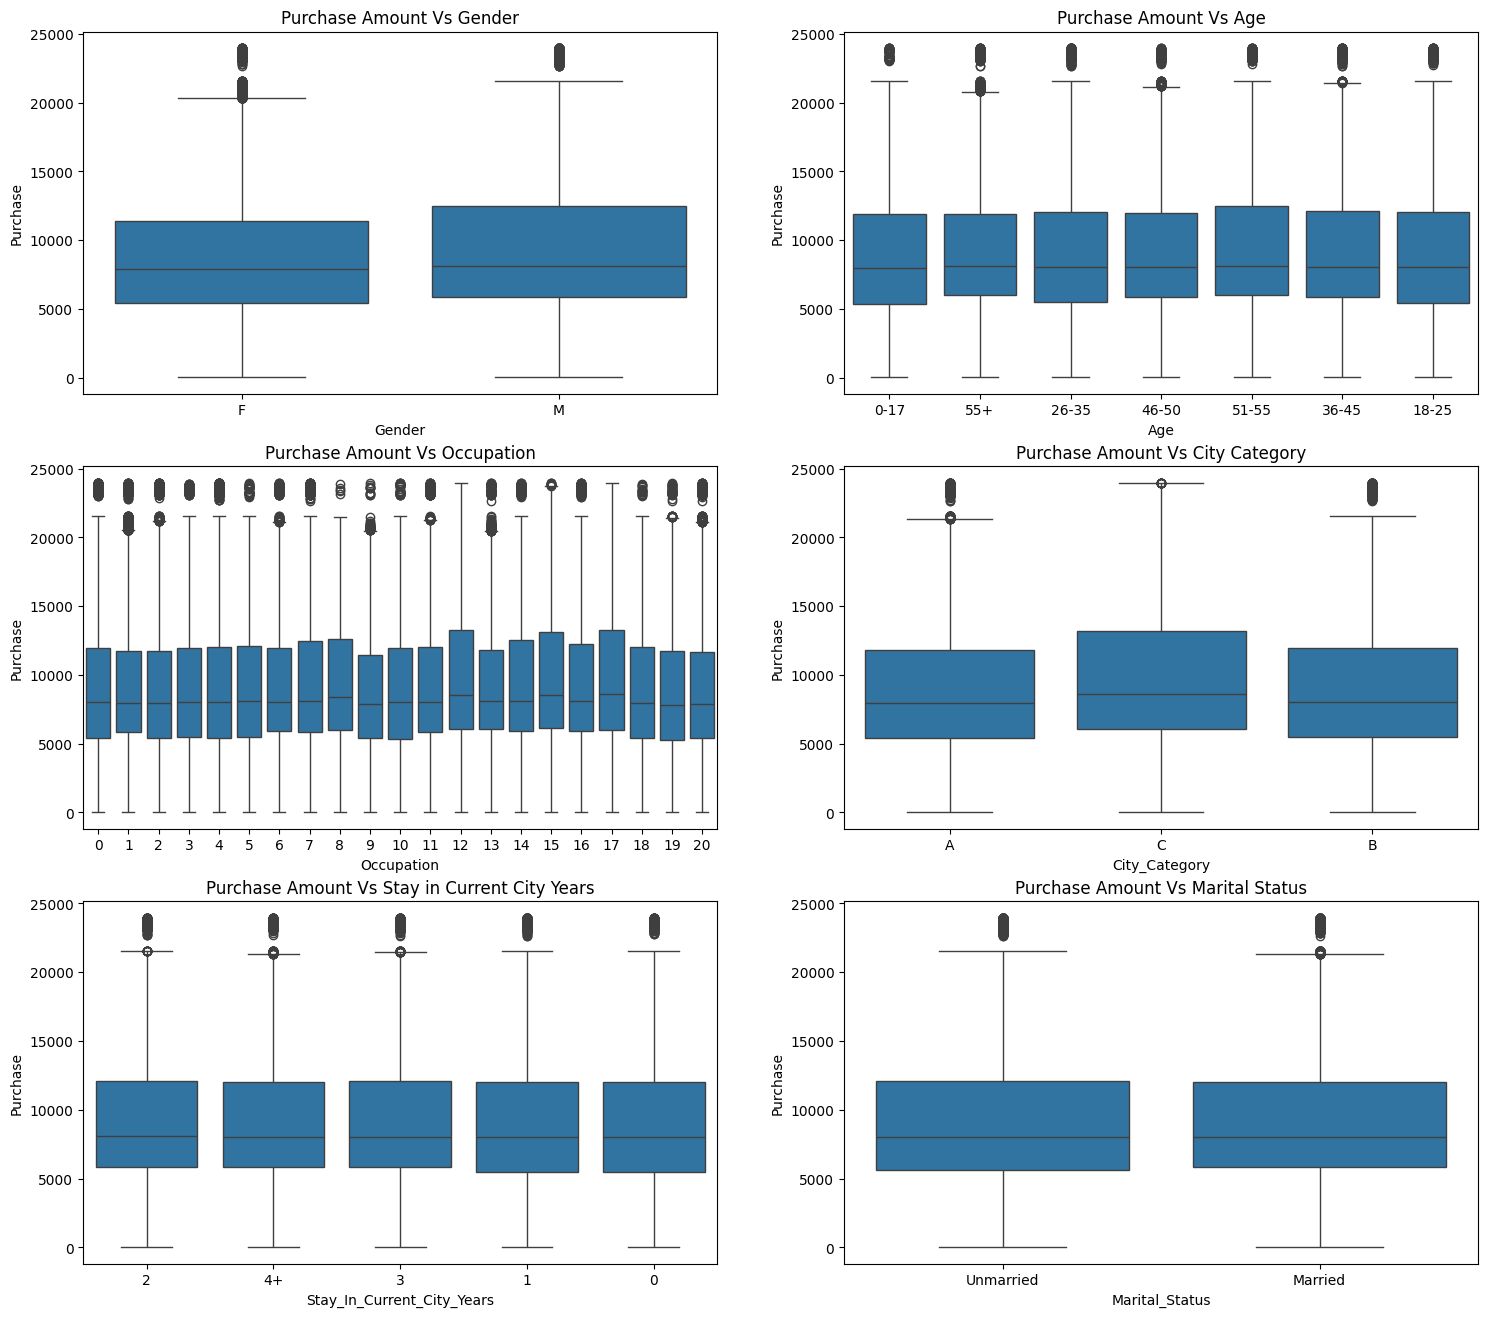

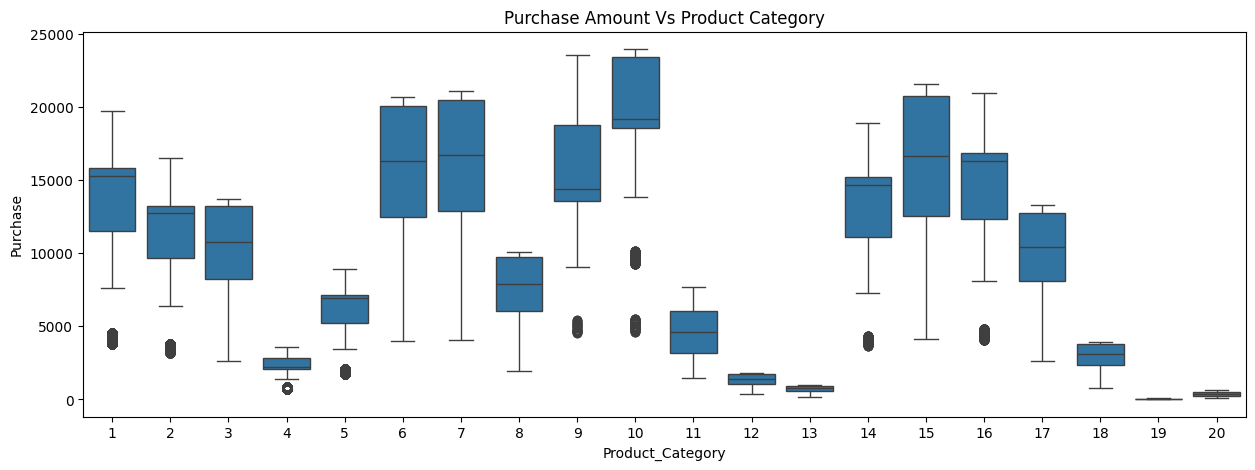

In [ ]:
fig, ax=plt.subplots(nrows=3, ncols=2, figsize=(18,16))
sns.boxplot(data=df, y='Purchase', x='Gender', ax=ax[0,0])
ax[0, 0].set_title('Purchase Amount Vs Gender')
sns.boxplot(data=df, y='Purchase', x='Age', ax=ax[0,1])
ax[0, 1].set_title('Purchase Amount Vs Age')
sns.boxplot(data=df, y='Purchase', x='Occupation', ax=ax[1,0])
ax[1, 0].set_title('Purchase Amount Vs Occupation')
sns.boxplot(data=df, y='Purchase', x='City_Category', ax=ax[1,1])
ax[1, 1].set_title('Purchase Amount Vs City Category')
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', ax=ax[2,0])
ax[2, 0].set_title('Purchase Amount Vs Stay in Current City Years')
sns.boxplot(data=df, y='Purchase', x='Marital_Status', ax=ax[2,1])
ax[2, 1].set_title('Purchase Amount Vs Marital Status')
plt.show()
figure = plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='Purchase', x='Product_Category')
plt.title('Purchase Amount Vs Product Category')
plt.show()

Insights:-
* The median purchase amount of males is slightly higher than females.
* The median purchase amount is slightly higher in 51-55 age group. In rest of the age groups, the median purchase is almost same.
* The median purchase amount is same across all occupations.
* The median purchase amount is higher in city category 'C'.
* The median purchase amount is almost same in Stay_in_current_city_years.
* Whether it is partnered or single, the median purchase amount for both is same.
* There are lot of differences in median Purchase amount of different product categories.   

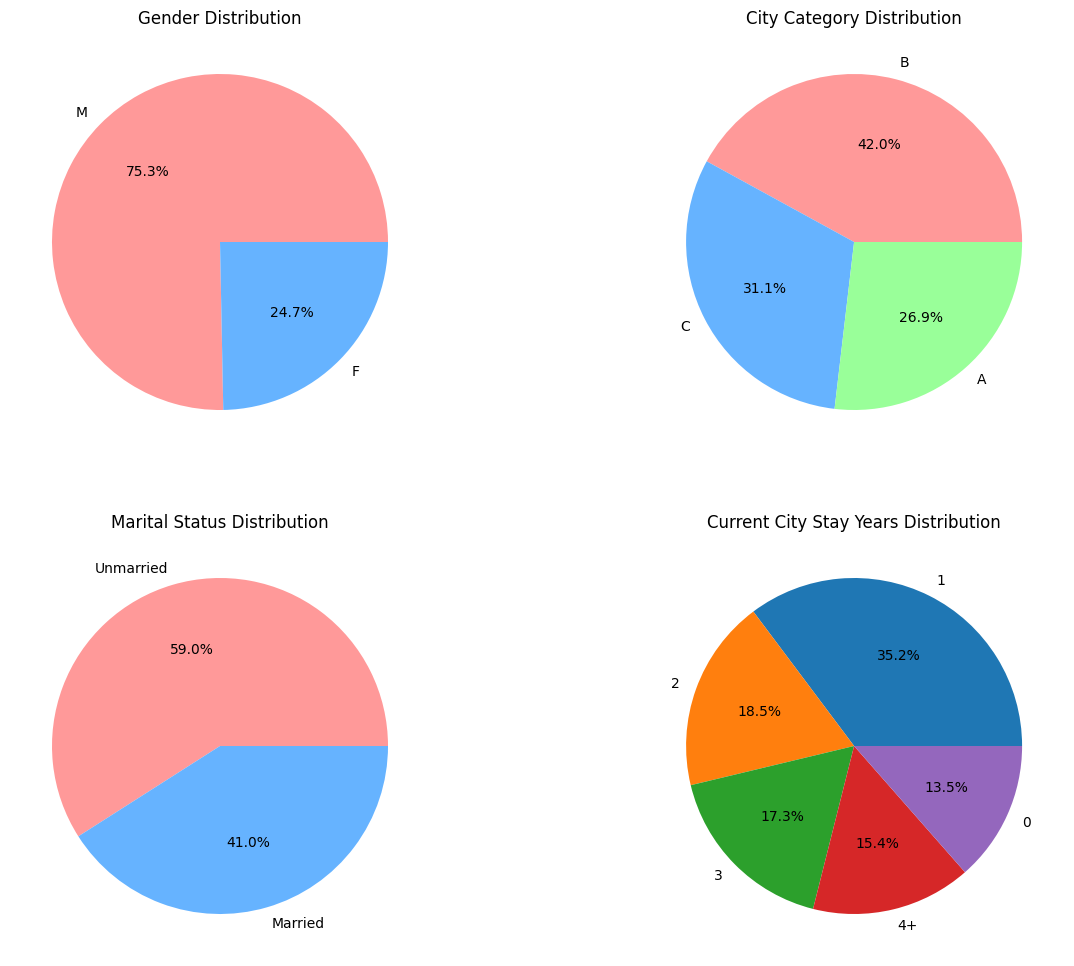

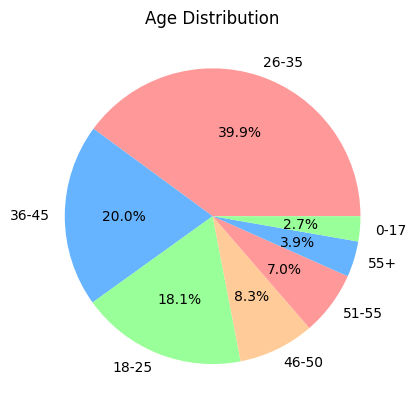

In [ ]:
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(15,12))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax[0,0].pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index, autopct="%2.1f%%", colors=colors)
ax[0, 0].set_title('Gender Distribution')
ax[0,1].pie(df['City_Category'].value_counts(), labels=df['City_Category'].value_counts().index, autopct="%2.1f%%", colors=colors)
ax[0, 1].set_title('City Category Distribution')
ax[1,0].pie(df['Marital_Status'].value_counts(), labels=df['Marital_Status'].value_counts().index, autopct="%2.1f%%", colors=colors)
ax[1, 0].set_title('Marital Status Distribution')
ax[1,1].pie(df['Stay_In_Current_City_Years'].value_counts(), labels=df['Stay_In_Current_City_Years'].value_counts().index, autopct="%2.1f%%")
ax[1,1].set_title('Current City Stay Years Distribution')
plt.show()
plt.pie(df['Age'].value_counts(), labels=df['Age'].value_counts().index, autopct="%2.1f%%", colors=colors)
plt.title('Age Distribution')
plt.show()

The Pie charts shows the univariate analysis of different columns such as
* Gender(proportion of male vs female)
* City Category (proportion of city category A vs B vs C)
* Marital Status (proportion of married vs unmarried)
* Current City Stay Year Distribution
* Age Group Distribution

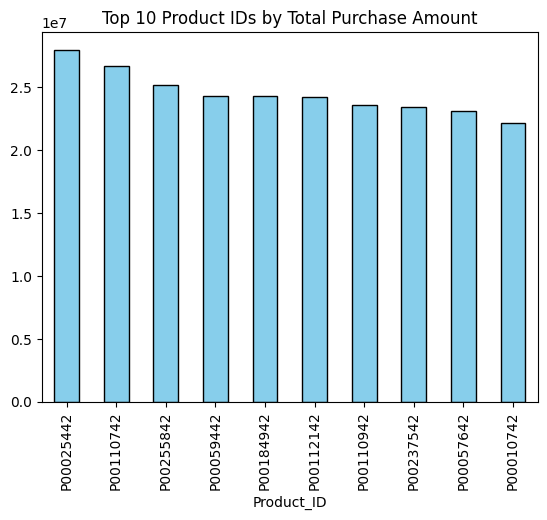

In [ ]:
product_purchase=df.groupby('Product_ID')['Purchase'].sum()
top10_productID_by_purchase=product_purchase.sort_values(ascending=False).head(10)
top10_productID_by_purchase.plot(kind='bar',color='skyblue', edgecolor='black')
plt.title("Top 10 Product IDs by Total Purchase Amount")
plt.show()

Insights:-
Clearly the product ID 'P00025442' has incurred the highest revenue for Walmart.

Recommendations:- As Product_id 'P00025442' is generating the most revenue for walmart, its inventory should never be out of stock.

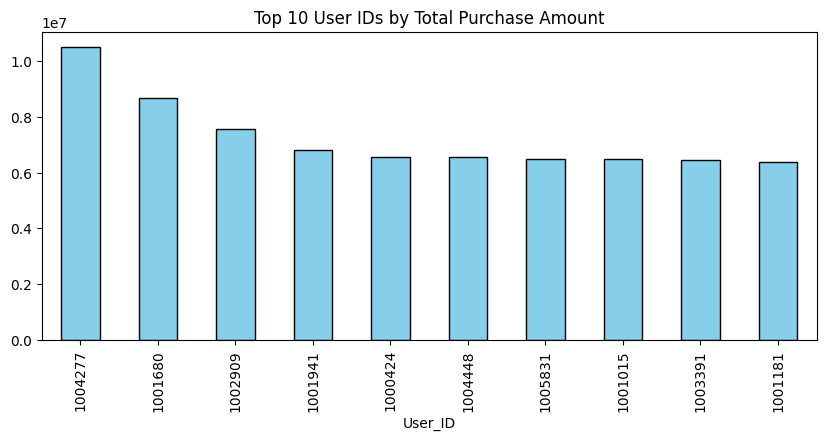

In [ ]:
user_purchase=df.groupby('User_ID')['Purchase'].sum()
top10_users=user_purchase.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
top10_users.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 User IDs by Total Purchase Amount')
plt.show()

* Insights:
* These are the Top 10 User IDs which spend the most amount on Walmart.
* Recommendations:
*  Walmart should give rewards to these users as they significantly contribute in the revenue. Maybe Walmart could launch special discounts or offers for these user_ids to encourage and give recognition to them






In [ ]:
from scipy.stats import norm
import scipy.stats as stats

In [ ]:
male_data= df[df['Gender']=='M']['Purchase']
female_data= df[df['Gender']=='F']['Purchase']

In [ ]:
np.mean(male_data), np.mean(female_data)

(9437.526040472265, 8734.565765155476)

In [ ]:
np.std(male_data), np.std(female_data)

(5092.180063635965, 4767.215738017004)

In [ ]:
#function to compute confidence interval
def compute_confidence_interval(data, confidence):
  mean=np.mean(data)
  std_error=np.std(data)/np.sqrt(len(data))
  z_score=norm.ppf((1+confidence)/2)
  margin_of_error= z_score*std_error
  return mean-margin_of_error, mean+margin_of_error

ci_male_full= compute_confidence_interval(male_data, 0.95)
ci_female_full= compute_confidence_interval(female_data, 0.95)

print(f"95% CI for male data (full data): {ci_male_full}")
print(f"95% CI for female data (full data): {ci_female_full}")

#function for bootstrapping confidence intervals:-
def bootstrap_confidence_interval(data, samples=1000, confidence=0.95):
  bootstrap_means=[]
  for _ in range(samples):
    bootstarp_sample= np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstarp_sample))
  lower_bound= np.percentile(bootstrap_means, (1-confidence)/2 *100)
  upper_bound= np.percentile(bootstrap_means, (1+confidence)/2 *100)
  return lower_bound, upper_bound

# Bootstrapping for smaller sample sizes
sample_sizes = [300, 3000, 30000]
ci_male_samples = []
ci_female_samples = []

for size in sample_sizes:
  male_sample= np.random.choice(male_data, size=size, replace=False)
  female_sample= np.random.choice(female_data, size=size, replace=False)
  ci_male_samples.append(bootstrap_confidence_interval(male_sample))
  ci_female_samples.append(bootstrap_confidence_interval(female_sample))

for size, ci_male, ci_female in zip(sample_sizes, ci_male_samples, ci_female_samples):
  print(f"95% CI for Male (sample size {size}): {ci_male}")
  print(f"95% CI for Female (sample size {size}): {ci_female}")

95% CI for male data (full data): (9422.019466078644, 9453.032614865886)
95% CI for female data (full data): (8709.211640485983, 8759.919889824969)
95% CI for Male (sample size 300): (8950.396999999999, 10065.287583333333)
95% CI for Female (sample size 300): (7727.2885, 8754.90825)
95% CI for Male (sample size 3000): (9423.254691666667, 9795.227275)
95% CI for Female (sample size 3000): (8608.157966666666, 8953.265383333333)
95% CI for Male (sample size 30000): (9388.558809166667, 9501.395994166667)
95% CI for Female (sample size 30000): (8686.7035925, 8794.181220833332)


In [ ]:
# for 90% confidence level:-
ci_male_full =compute_confidence_interval(male_data,0.90)
ci_female_full= compute_confidence_interval(female_data,0.90)

print(f"90% CI for male data (full data): {ci_male_full}")
print(f"90% CI for female data (full data): {ci_female_full}")

90% CI for male data (full data): (9424.51251301251, 9450.539567932019)
90% CI for female data (full data): (8713.28791298587, 8755.843617325081)


In [ ]:
# for 99% confidence level:-
ci_male_full=compute_confidence_interval(male_data, 0.99)
ci_female_full=compute_confidence_interval(female_data, 0.99)

print(f"99% CI for male data (full data): {ci_male_full}")
print(f"99% CI for female data (full data): {ci_female_full}")

99% CI for male data (full data): (9417.146947266567, 9457.905133677963)
99% CI for female data (full data): (8701.244797114914, 8767.886733196037)


* 99% Confidence interval is the widest interval. We can also compare this with our above readings.
* With 99% confidence level, we are more certain that the interval contains the true population parameter, but this comes at the cost of resuced precision.

Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?

* Male (Full data):- (9422.01, 9453.03) -> width= 31.02
* Female (full data):- (8709.21, 8759.91) -> width= 50.7
* The confidence interval for females using the entire dataset is slightly wider than males.
* It can maybe due to the sample size. Maybe the sample size of females is less compared to males.
* It could also be due to higher variability in data. i.e. females exhibit more variability in spending(data points are more spread out) then the confidence interval would be wider.

**How is the width of the confidence interval affected by the sample size?**

* We know that according to CLT as sample size increases, the confidence interval decreases.
* This happens because large sample size reduces the standard error of the mean, leading to more precise estimate of the population mean.

* 95% CI for Male (sample size 300): (8964.484583333335, 10169.75) Width:-1205
* 95% CI for Male (sample size 3000): (9314.555733333335, 9666.091066666666) Width:- 352
* 95% CI for Male (sample size 30000): (9406.614155833333, 9516.881126666667) Width:- 110
* 95% CI for Female (sample size 300): (8638.6425, 9685.168166666666) Width:- 1047
* 95% CI for Female (sample size 3000): (8397.433683333335, 8741.833633333334) Width:- 344
* 95% CI for Female (sample size 30000): (8657.5078775, 8762.488125833333) Width:- 105

* So, the above results shows and clearly prooves our statement that as the sample size is increasing for both males and females, the the width of Confidence Interval is decreasing significantly.





**Do the confidence intervals for different sample sizes overlap?**

* Yes, the confidence intervals for different sample sizes do overlap for both genders.

How does the sample size affect the shape of the distributions of the
means?

* When the sample size is small, the distribution of the sample means may not resemble a normal distribution.
* As the sample size increases, the distribution of the sample means become increasingly normal, regardless of the shape of original population distribution.

* With smaller samples, there is more variability in the sample means, leading to a wider spread in the distribution.
* As the sample size increases, the standard error decreases causing the distribution of sample means to become more concentrated around the true population mean. This results in narrower distribution indicating that larger samples provides more reliable estimates of the population mean.




**How does Marital_Status affect the amount spent?**



In [ ]:
unmarried_data=df[df['Marital_Status']=='Unmarried']['Purchase']
married_data=df[df['Marital_Status']=='Married']['Purchase']

In [ ]:
def compute_confidence_interval(data, confidence):
  mean=np.mean(data)
  std_error= np.std(data)/np.sqrt(len(data))
  z_score=norm.ppf((1+confidence)/2)
  margin_of_error= z_score*std_error
  return mean-margin_of_error, mean+margin_of_error

#computing confidence interval for the entire dataset:-
ci_unmarried_full= compute_confidence_interval(unmarried_data, 0.95)
ci_married_full= compute_confidence_interval(married_data, 0.95)

print(f"95% CI for Unmarried (full data): {ci_unmarried_full}")
print(f"95% CI for Married (full data): {ci_married_full}")

#function for bootstrapping confidence intervals:-
def bootstrap_confidence_interval(data, num_samples=1000, confidence=0.95):
  bootstrap_means= []
  for _ in range(num_samples):
    bootstrap_sample= np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
  lower_bound= np.percentile(bootstrap_means, (1-confidence)/2 *100)
  upper_bound= np.percentile(bootstrap_means, (1+confidence)/2 *100)
  return lower_bound, upper_bound

#bootstrapping for smaller sample sizes:-
sample_sizes= [300,3000,30000]
ci_unmarried_samples=[]
ci_married_samples=[]

for size in sample_sizes:
  unmarried_sample= np.random.choice(unmarried_data, size=size, replace=False)
  married_sample= np.random.choice(married_data, size=size, replace=False)

  ci_unmarried= bootstrap_confidence_interval(unmarried_sample)
  ci_married= bootstrap_confidence_interval(married_sample)
  print(f"95% CI for Unmarried (sample size {size}): {ci_unmarried}")
  print(f"95% CI for married (sample size {size}): {ci_married}")

95% CI for Unmarried (full data): (9248.616444810585, 9283.198793032429)
95% CI for Married (full data): (9240.460473019726, 9281.88867514502)
95% CI for Unmarried (sample size 300): (8845.632083333334, 9984.610999999999)
95% CI for married (sample size 300): (8812.635, 9952.604583333334)
95% CI for Unmarried (sample size 3000): (8991.608341666668, 9350.984375)
95% CI for married (sample size 3000): (9152.879691666667, 9511.453341666665)
95% CI for Unmarried (sample size 30000): (9238.893742499999, 9347.156813333333)
95% CI for married (sample size 30000): (9234.48263, 9348.830459166667)


In [ ]:
#for 90% confidence level
ci_unmarried_full=compute_confidence_interval(unmarried_data, 0.90)
ci_married_full= compute_confidence_interval(married_data, 0.90)
print(f"90% CI for Unmarried (full data): {ci_unmarried_full}")
print(f"90% CI for Married (full data): {ci_married_full}")

90% CI for Unmarried (full data): (9251.396408167155, 9280.418829675858)
90% CI for Married (full data): (9243.790752476116, 9278.558395688631)


In [ ]:
#for 99% confidence level
ci_unmarried_full=compute_confidence_interval(unmarried_data, 0.99)
ci_married_full= compute_confidence_interval(married_data, 0.99)
print(f"99% CI for Unmarried (full data): {ci_unmarried_full}")
print(f"99% CI for Married (full data): {ci_married_full}")

99% CI for Unmarried (full data): (9243.183164125909, 9288.632073717105)
99% CI for Married (full data): (9233.951630735093, 9288.397517429654)


* 99% Confidence interval is the widest interval. We can also compare this with our above readings.
* With 99% confidence level, we are more certain that the interval contains the true population parameter, but this comes at the cost of resuced precision.

Is the confidence interval computed using the entire dataset wider for
one of the Marital Status? Why is this the case?

* 95% CI for Unmarried (full data): (9248.616444810585, 9283.198793032429)
* 95% CI for Married (full data): (9240.460473019726, 9281.88867514502)

* Unmarried (full data): (9283.19-9248.61) width-> 34.58
* Married (full data): (9281.88-9240.46) width-> 41.42

* The confidence interval for Married using the entire dataset is slightly wider than Unmarried.
* It can maybe due to the sample size. Maybe the sample size of Unmarried is less compared to males.
* It could also be due to higher variability in data. i.e. Married exhibit more variability in spending(data points are more spread out) then the confidence interval would be wider.

**How is the width of the confidence interval affected by the sample size?**

* We know that according to CLT as sample size increases, the confidence interval decreases. When sample size is 300, the width of CI is very high. When sample size increased to 3000, the width of CI became narrower. and when sample size increased to 30000, the width of CI became more narrower.

*  This happens because large sample size reduces the standard error of the mean, leading to more precise estimate of the population mean.




**Do the confidence intervals for different sample sizes overlap?**

Yes, the confidence intervals for different sample sizes do overlap for both genders.

**How does the sample size affect the shape of the distributions of the means?**

* When the sample size is small, the distribution of the sample means may not resemble a normal distribution.
* As the sample size increases, the distribution of the sample means become increasingly normal, regardless of the shape of original population distribution.

* With smaller samples, there is more variability in the sample means, leading to a wider spread in the distribution.
* As the sample size increases, the standard error decreases causing the distribution of sample means to become more concentrated around the true population mean. This results in narrower distribution indicating that larger samples provides more reliable estimates of the population mean.
  








**How does Age affect the amount spent?**

In [ ]:
age_groups={
    '0-17': df[df['Age']=='0-17']['Purchase'],
    '18-25': df[df['Age']=='18-25']['Purchase'],
    '26-35': df[df['Age']=='26-35']['Purchase'],
    '36-45': df[df['Age']=='36-45']['Purchase'],
    '46-50': df[df['Age']=='46-50']['Purchase'],
    '51-55': df[df['Age']=='51-55']['Purchase'],
    '55+': df[df['Age']=='55+']['Purchase']
}

#function to compute confidence interval
def compute_confidence_interval(data, confidence):
  mean=np.mean(data)
  std_error= np.std(data)/np.sqrt(len(data))
  z_score= norm.ppf((1+confidence)/2)
  margin_of_error= z_score*std_error
  return mean-margin_of_error, mean+margin_of_error

ci_full_age_data= {age_group: compute_confidence_interval(data, 0.95) for age_group, data in age_groups.items()}

for age_group, ci in ci_full_age_data.items():
  print(f"95% CI for age group {age_group} (full data): {ci}")

def bootstrap_confidence_interval(data, num_samples=1000, confidence=0.95):
  bootstrap_means=[]
  for _ in range(num_samples):
    bootstrap_sample= np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
  lower_bound= np.percentile(bootstrap_means, (1-confidence)/2 *100)
  upper_bound= np.percentile(bootstrap_means, (1+confidence)/2 *100)
  return lower_bound, upper_bound

# bootstrapping for smaller sample sizes:-
sample_sizes= [300, 3000, 30000]
ci_samples= {age_group: [] for age_group in age_groups.keys()}

for size in sample_sizes:
  for age_group, data in age_groups.items():
    if len(data) < size:
      sample = np.random.choice(data, size=size, replace=True)
    else:
      sample = np.random.choice(data, size=size, replace=False)
    ci_samples[age_group].append(bootstrap_confidence_interval(sample))

for age_group, ci_list in ci_samples.items():
  for size, ci in zip(sample_sizes, ci_list):
    print(f"95% CI for age group {age_group} (sample size {size}): {ci}")



95% CI for age group 0-17 (full data): (8851.950669457377, 9014.97861143257)
95% CI for age group 18-25 (full data): (9138.40810556528, 9200.919106957297)
95% CI for age group 26-35 (full data): (9231.733724119113, 9273.647541620663)
95% CI for age group 36-45 (full data): (9301.669545864605, 9361.031843971143)
95% CI for age group 46-50 (full data): (9163.085640896097, 9254.165754040558)
95% CI for age group 51-55 (full data): (9483.992132719022, 9585.623929201449)
95% CI for age group 55+ (full data): (9269.300391858294, 9403.260527040515)
95% CI for age group 0-17 (sample size 300): (8159.166583333334, 9276.2035)
95% CI for age group 0-17 (sample size 3000): (8675.249916666666, 9037.47375)
95% CI for age group 0-17 (sample size 30000): (8865.8726975, 8982.879664166667)
95% CI for age group 18-25 (sample size 300): (8292.65025, 9508.316666666666)
95% CI for age group 18-25 (sample size 3000): (9091.337425, 9442.911199999999)
95% CI for age group 18-25 (sample size 30000): (9121.15749

In [ ]:
ci_full_age_data = {age_group: compute_confidence_interval(data,0.90) for age_group, data in age_groups.items()}
for age_group, ci in ci_full_age_data.items():
  print(f"90% CI for age group {age_group} (full data): {ci}")

90% CI for age group 0-17 (full data): (8865.055959528509, 9001.87332136144)
90% CI for age group 18-25 (full data): (9143.43316320849, 9195.894049314087)
90% CI for age group 26-35 (full data): (9235.10304062824, 9270.278225111535)
90% CI for age group 36-45 (full data): (9306.441489413359, 9356.259900422388)
90% CI for age group 46-50 (full data): (9170.40727722425, 9246.844117712404)
90% CI for age group 51-55 (full data): (9492.161984814407, 9577.454077106064)
90% CI for age group 55+ (full data): (9280.069014759747, 9392.491904139062)


In [ ]:
ci_full_age_data = {age_group: compute_confidence_interval(data,0.99) for age_group, data in age_groups.items()}
for age_group, ci in ci_full_age_data.items():
  print(f"99% CI for age group {age_group} (full data): {ci}")

99% CI for age group 0-17 (full data): (8826.33712342187, 9040.592157468078)
99% CI for age group 18-25 (full data): (9128.586915452215, 9210.740297070362)
99% CI for age group 26-35 (full data): (9225.148586129311, 9280.232679610464)
99% CI for age group 36-45 (full data): (9292.343052891047, 9370.3583369447)
99% CI for age group 46-50 (full data): (9148.775918018655, 9268.475476918)
99% CI for age group 51-55 (full data): (9468.02462024027, 9601.5914416802)
99% CI for age group 55+ (full data): (9248.253729256525, 9424.307189642284)


* 99% Confidence interval is the widest interval. We can also compare this with our above readings.
* With 99% confidence level, we are more certain that the interval contains the true population parameter, but this comes at the cost of resuced precision.

Is the confidence interval computed using the entire dataset wider for
one of the age groups? Why is this the case?

* 95% CI for age group 0-17 (full data): (8851.950669457377, 9014.97861143257)
width:- 9014.97-8851.95 =163.02
* 95% CI for age group 18-25 (full data): (9138.40810556528, 9200.919106957297)
width:- 9200.91-9138.40= 62.51
* 95% CI for age group 26-35 (full data): (9231.733724119113, 9273.647541620663)
width:- 9273.64-9231.73= 41.91
* 95% CI for age group 36-45 (full data): (9301.669545864605, 9361.031843971143)
width:- 9361.03-9301.66= 59.37
* 95% CI for age group 46-50 (full data): (9163.085640896097, 9254.165754040558)
width:- 9254.16-9163.08= 91.08
* 95% CI for age group 51-55 (full data): (9483.992132719022, 9585.623929201449)
width:- 9585.62-9483.99=101.63
* 95% CI for age group 55+ (full data): (9269.300391858294, 9403.260527040515)
width:- 9403.26-9269.30= 133.96

* Widest CI is for age group 0-17 and narrowest CI is for age group 26-35.
* The wider CI can be due to larger variability in the data.

**How is the width of the confidence interval affected by the sample size?**

* We know that according to CLT as sample size increases, the confidence interval
decreases. When sample size is 300, the width of CI is very high. When sample size increased to 3000, the width of CI became narrower. and when sample size increased to 30000, the width of CI became more narrower.

* This happens because large sample size reduces the standard error of the mean, leading to more precise estimate of the population mean.

**Do the confidence intervals for different sample sizes overlap?**

* Yes, the confidence intervals for different sample sizes do overlap for all age groups

**How does the sample size affect the shape of the distributions of the means?**

 When The sample size is small:-

* Distribution of means may not be normal
* The variability(spread) of the sample means will be larger

 When The Sample size is Large:-

* Distribution of sample means become inreasingly normal, regardless of the shape of original data distribution.
* The variability(spread) of the sample mean decreases with larger sample size.
* The Standard error decreases as the sample size increases.

Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?

* 95% CI for male data(full data): (9422.019466078644, 9453.032614865886)
* 95% CI for female data (full data): (8709.211640485983, 8759.919889824969)

* The confidence intervals for male and female data do not overlaps.
This Suggest that there is a statistically significant between the averages amount spent by males and females.
* For Males:
* Since males are already spending more on average, Walmart could focus on upselling premium products to male customers.
* Walmart may increase inventory for products that are popular among males, ensuring high demand items are always in stock.

* For Females:
* Walmart may introduce discounts or special offers on categories where females are more likely to spend, thus encouraging their spending.
* Explore and introduce products that might encorage females to spend more.

* Overall Walmart can optimize its marketing strategies, product selection and customer segmentation strategies to increase sales and customer satisfaction.

Report whether the confidence intervals for the average amount spent by
married and unmarried (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?

* 95% CI for Unmarried (full data): (9248.616444810585, 9283.198793032429)
* 95% CI for Married (full data): (9240.460473019726, 9281.88867514502)

* The confidence intervals for Married and unmarried customers do overlaps.

* Since the average spending between married and unmarried customers is similar,
Walmart can employ a unified marketing strategy targeting both the groups.

* Can implement promotions and discounts that appeals to both married and unmarried customers, as there is no siginficant difference in their spending behaviour.

Report whether the confidence intervals for the average amount spent by
different age groups (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?

* 95% CI for age group 0-17 (full data): (8851.950669457377, 9014.97861143257)
* 95% CI for age group 18-25 (full data): (9138.40810556528, 9200.919106957297)
* 95% CI for age group 26-35 (full data): (9231.733724119113, 9273.647541620663)
* 95% CI for age group 36-45 (full data): (9301.669545864605, 9361.031843971143)
* 95% CI for age group 46-50 (full data): (9163.085640896097, 9254.165754040558)
* 95% CI for age group 51-55 (full data): (9483.992132719022, 9585.623929201449)
* 95% CI for age group 55+ (full data): (9269.300391858294, 9403.260527040515)

* Age group 0-17 vs 18-25:- No overlap.
* Age group 18-25 vs 26-35:- No overlap.
* Age group 26-35 vs 36-45:- No overlap.
* Age group 36-45 vs 46-50:- Overlap.
* Age group 46-50 vs 51-55:- No overlap.
* Age group 51-55 vs 55+:- Overlap.

* Age groups 36-45 and 46-50 have overlapping confidence intervals, indicating similar spending patterns.
* Age group 51-55 has a significantly higher confidence interval, suggesting this group spends more on an average.
* Age group 0-17 has lower confidence interval, indicating lower average spending compared to other age groups.

* For 51-55 age group, higher valued products can be targeted to them, as they tend to spend more on average.
* For 0-17 age group, budget friendly products or bundled offers can be offered to them as they tend to spend less on average.
* For age groups 26-50, Walmart can develop targeted marketing campaigns as their spending habits are similar.

**Recommendations:-**

* Targeted Marketing Strategies
*   Gender Based:- As we have seen that male customers tends to spend more on average than female customers, Walmart could focus on marketing campaigns and strategies that are most favourable for male customers. If Walmart want to increase the average purcase amount of female customers, maybe they can introduce more female oriented products or latest and exclusive female products.

*   Age Group Based:- As we saw, that 51-55 age group spends more on average than other age groups. Walmart can run an exclusive scheme targeting this age group. age group 0-17 are majorly school/college going customers, so more budget friendly and education related products can be offered to them.
40% sales are alone coming from 26-35 age group customers so this age group is very important.


* Product Categories 1, 5 and 8 are the most sold and popular prodcut categories. So Walmart should have a surplous inventory of these categories so that there is no shortage of them.

* The product categories like 1, 5 and 8 which are generating the most revenue for Walmart, new products can be added in these high-performing product categories.

* Product Categories like 7, 14, 9 and 17-20 have a very lower sales. Maybe Walmart can discard them or they can be bundles with popular product categories to increase their sales also.


*   City Category 'B' account for 42% of the sales. Walmart could ensure that stores in cities classified as Category 'B' are well-stocked, especially with popular items and categories.











